## 1. Install and Import all required python libraries

In [1]:
# Importing all libraries
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from shapely.geometry import MultiPolygon, Polygon
import shapely
import geojson
import glob
from zipfile import ZipFile
import matplotlib.pyplot as plt

## 2. Create an account in https://scihub.copernicus.eu/dhus/#/home and add username and password below

In [2]:
# Login with credentials
user = 'Enter your Username'
password = ' Enter your Password'
api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')

## 3. Search list of sensing images in Dehradun area with time, cloud cover, etc

In [3]:
# read Geojson file
aoi_gj = read_geojson('./vector_data/dehradun.geojson')
# convert Geojson to shapely polygon format
aoi_sh = shapely.geometry.Polygon(list(geojson.utils.coords(aoi_gj)))

# search by polygon, time, and SciHub query keywords
footprint = geojson_to_wkt(aoi_gj)
products = api.query(footprint,
                     date=('20210401', '20210410'),
                     platformname='Sentinel-2',
                     processinglevel='Level-2A',
                     cloudcoverpercentage=(0, 10)
                    )

## 4. Print list of queried images and image with less cloud cover

In [8]:
# sort images with the cloud percentage
products_gdf = api.to_geodataframe(products)
# print(products_gdf)
print(products_gdf.shape)
products_gdf_sorted = products_gdf.sort_values(['cloudcoverpercentage'], ascending=[True])
# Cloud mask percentage
temp = products_gdf_sorted[['filename', 'cloudcoverpercentage']]
print(temp.iloc[0,:])

(2, 41)
filename                S2A_MSIL2A_20210403T050651_N0300_R019_T43PHQ_2...
cloudcoverpercentage                                              4.26719
Name: 47b73e51-01ae-4647-87c2-1a9b790267e4, dtype: object


## 5. Plot list of queried images

C:\Users\Venky\.conda\envs\senti\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  after removing the cwd from sys.path.


47b73e51-01ae-4647-87c2-1a9b790267e4    Annotation(78.2715, 13.0511, '47b73e51-01ae-46...
d7cc8c2b-edec-4468-b345-f94a324efe59    Annotation(77.357, 13.0557, 'd7cc8c2b-edec-446...
dtype: object

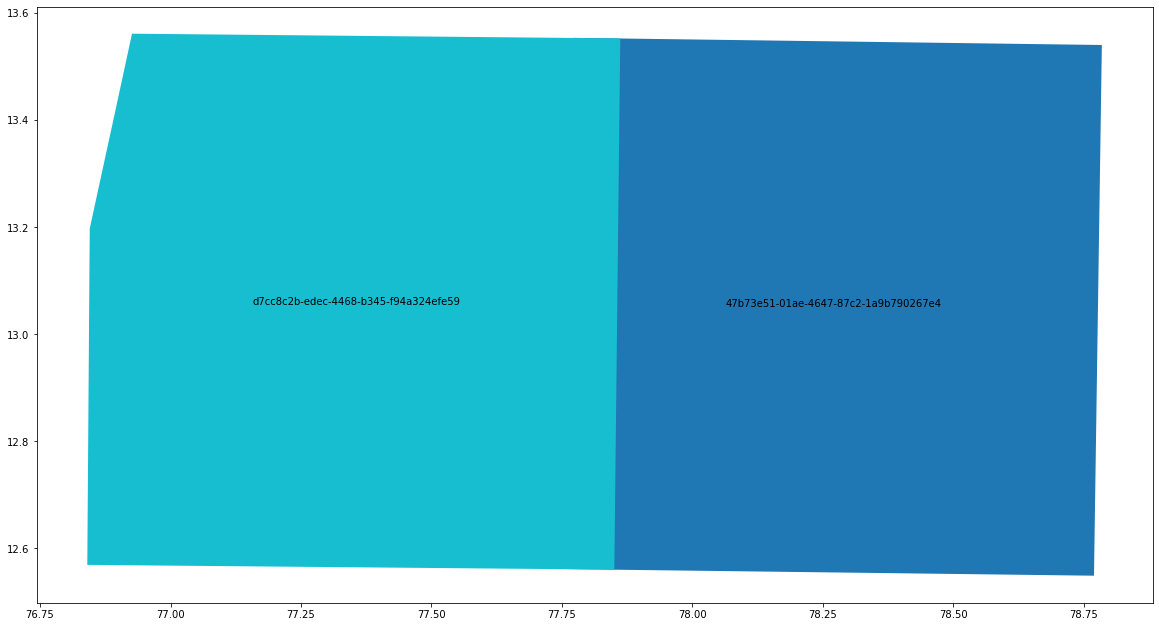

In [12]:
# products_gdf.plot(column='uuid', cmap=None)
# areas = api.to_geodataframe(products_gdf)
ax = products_gdf.plot(column='uuid', cmap=None, figsize=(20, 20))
products_gdf.apply(lambda x: ax.annotate(s=x.uuid, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

## 6. Download Image/Images

In [14]:
# download single image with less cloud cover
directory = "./raster_data"
number_of_images = 1
print("Downloading " + str(number_of_images) + " images")
for i in range(number_of_images):
    api.download(products_gdf_sorted.index[i])

LTATriggered: Product 47b73e51-01ae-4647-87c2-1a9b790267e4 is not online. Triggered retrieval from the Long Term Archive.

## 7. Extract downloaded zip file

In [ ]:
# specifying the zip file name
print('Extracting all zip files the files now...')
for i in glob.glob("./raster_data/*.zip"):
    # opening the zip file in READ mode
    with ZipFile(i, 'r') as zip:
        # printing all the contents of the zip file
        zip.printdir()
        # extracting all the files
        zip.extractall("./data")
        print(i, ' is extracted')